<a href="https://colab.research.google.com/github/GabrielaFuller/Aether/blob/main/Fuller_580_hw2_startup_(1)_(1)_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 580 Artificial Intelligence II, Winter 2025
# HW\#2 Cliffwalk -- Start-up code


### 1. Install gymnasium and create a Cliff Walk environment

In [ ]:
# Install gymnasium (in particular the toy-text subset)
!pip install gymnasium[toy-text]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 12.5 MB/s eta 0:00:00


array([[[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97],
        ...,
        [ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69]],

       [[ 91, 150,  97],
        [ 91, 150,  97],
        [ 98, 166, 105],
        ...,
        [105, 182,  74],
        [105, 182,  74],
        [ 86, 170,  69]],

       ...,

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 93, 188,  74],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]],

       [[ 86, 170,  69],
        [ 86, 170,  69],
        [ 86, 170,  69],
        ...,
        [ 91, 150,  97],
        [ 91, 150,  97],
        [ 91, 150,  97]]], dtype=uint8)
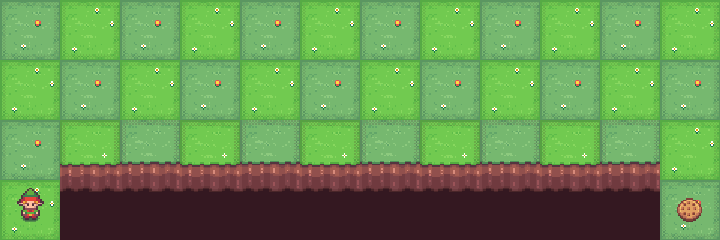

In [ ]:
import gymnasium as gym
import numpy as np

# Create a Cliff Walk environment using Gymnasium
env = gym.make("CliffWalking-v0", is_slippery=True, render_mode="rgb_array")#'ansi')#

# Reset the environment and display it
env.reset()

#print (env.render())  # textual output if mode == 'ansi' or 'human'
env.render() # gui/rgb output

### 2. Inspect environment, transition probabilities and rewards

In [ ]:
nS = env.observation_space.n    # number of states -- 48
nA = env.action_space.n     # number of actions -- four directions; 0:up, 1:right, 2:down, 3:left
print ("{}, {}".format(nS, nA))

48, 4


Transition probabilities, rewards and other info are stored a dictionary **env.P**.  You use state index (0-based) to access the info.  The tuple for each transition indicates (transition_probability, new_state, reward, terminated).

**IMPORTANT**: If you get an error "AttributeError: 'OrderEnforcing' object has no attribute 'P'", add a line to unwrap the environment and access P inside.  For example,

<pre># Access the underlying environment using env.unwrapped
env_unwrapped = env.unwrapped

# Now you can access the transition probabilities
env_unwrapped.P[0]</pre>

In [ ]:
# Probatilies from State 0 (top-left corner).
#env.P[0]

# Access the underlying environment using env.unwrapped
env_unwrapped = env.unwrapped

# Now you can access the transition probabilities
env_unwrapped.P[0]

{0: [(0.3333333333333333, 0, -1, False),
  (0.3333333333333333, 0, -1, False),
  (0.3333333333333333, 1, -1, False)],
 1: [(0.3333333333333333, 0, -1, False),
  (0.3333333333333333, 1, -1, False),
  (0.3333333333333333, 12, -1, False)],
 2: [(0.3333333333333333, 1, -1, False),
  (0.3333333333333333, 12, -1, False),
  (0.3333333333333333, 0, -1, False)],
 3: [(0.3333333333333333, 12, -1, False),
  (0.3333333333333333, 0, -1, False),
  (0.3333333333333333, 0, -1, False)]}

In [ ]:
# Probatilies from the start state (36)
env_unwrapped.P[36]

{0: [(0.3333333333333333, 36, -1, False),
  (0.3333333333333333, 24, -1, False),
  (0.3333333333333333, 36, -100, False)],
 1: [(0.3333333333333333, 24, -1, False),
  (0.3333333333333333, 36, -100, False),
  (0.3333333333333333, 36, -1, False)],
 2: [(0.3333333333333333, 36, -100, False),
  (0.3333333333333333, 36, -1, False),
  (0.3333333333333333, 36, -1, False)],
 3: [(0.3333333333333333, 36, -1, False),
  (0.3333333333333333, 36, -1, False),
  (0.3333333333333333, 24, -1, False)]}

In [ ]:
# Transition probability for trying to go left (action 3) from the start state (36)
env_unwrapped.P[36][3]

[(0.3333333333333333, 36, -1, False),
 (0.3333333333333333, 36, -1, False),
 (0.3333333333333333, 24, -1, False)]

## 3. Create a random/fixed policy and run the policy once.


In [ ]:
def generate_random_policy(num_actions, num_states, seed=None):
    """
    A policy is a 1D array of length # of states, where each element is a
    number between 0 (inclusive) and # of actions (exclusive) randomly chosen.
    If a specific seed is passed, the same numbers are genereated, while
    if the seed is None, the numbers are unpredictable every time.
    """
    rng = np.random.default_rng(seed)
    return rng.integers(low=0, high=num_actions, size=num_states)

In [ ]:
def run(env, pi, printinfo=False):
    """
    Run the policy on the environment and returns the cumulative reward.
    :param: env: The environment
    :param: pi: A given policy, represented as a 1D array of length # of states.
    :return: Cumulative reward
    """
    s = env.reset()
    if printinfo == True:
        print(f'\n* Episode starting from state {s[0]}')  # ensure starting from state 36

    s = s[0]  # extract the state value/index from the tuple
    done = False  # this becomes true when agent reaches the goal state (47)
    sum_r = 0
    steps = 0
    near_falls = 0  # added

    while not done:
        a = pi[s]  # action for the state s, according to the policy
        s, r, done, info, p = env.step(a)  # take the action
        sum_r += r  # accumulate reward
        steps += 1  # incrementally adding step count

        # checking for near-falls
        near_fall_states = [35, 36, 37]
        if s in near_fall_states:
            near_falls += 1  # near-falls count
        if printinfo:
            print(f'next_state={s}, reward={r}, done={done}, info={info}, p={p}')

        ### uncomment below to see the information for each ste

        # prints info in text if render_mode is 'ansi' or no output if 'human',
        # or graphical output if 'rgb_array' AND if the code is run from command line.
        env.render()
    return steps, near_falls, sum_r

### Run the given policy just once and observe what's returned (the total return).

In [ ]:
policy = generate_random_policy(nA, nS, 17) # third parameter is the random seed
print ("*** Policy ***\n{}".format(policy.reshape((4, 12))))

# Do just one run
result = run(env, policy)
steps, near_falls, total_rewards = result #results shown
# Print the total rewards/return
print(f' ==> Steps taken: {steps}, Near-falls: {near_falls}, Total rewards: {total_rewards}')

*** Policy ***
[[2 3 0 0 1 2 3 1 0 0 1 1]
 [3 1 2 2 0 2 0 0 2 1 1 2]
 [0 0 2 3 2 3 1 0 2 2 2 2]
 [1 0 2 0 1 0 2 1 1 2 0 1]]
 ==> Steps taken: 3618, Near-falls: 309, Total rewards: -24309


In [ ]:
#fixed policy 1
policy = generate_random_policy(nA, nS, 11) # third parameter is the random seed
print ("*** Policy ***\n{}".format(policy.reshape((4, 12))))

# Do just one run
result = run(env, policy)
steps, near_falls, total_rewards = result #results shown
# Print the total rewards/return
print(f' ==> Steps taken: {steps}, Near-falls: {near_falls}, Total rewards: {total_rewards}')

*** Policy ***
[[0 0 3 1 2 2 2 0 1 0 1 3]
 [2 0 2 0 3 3 3 2 3 1 0 2]
 [1 2 3 1 3 0 1 3 0 2 1 2]
 [3 3 3 2 3 3 0 0 1 2 3 1]]
 ==> Steps taken: 4545, Near-falls: 845, Total rewards: -17118


In [ ]:
#fixed policy 2
policy = generate_random_policy(nA, nS, 29) # third parameter is the random seed
print ("*** Policy ***\n{}".format(policy.reshape((4, 12))))

# Do just one run
result = run(env, policy)
steps, near_falls, total_rewards = result #results shown
# Print the total rewards/return
print(f' ==> Steps taken: {steps}, Near-falls: {near_falls}, Total rewards: {total_rewards}')

*** Policy ***
[[3 0 2 2 0 2 2 1 2 0 3 0]
 [1 1 0 1 2 0 0 0 0 3 0 2]
 [3 3 0 3 3 2 1 0 0 3 3 1]
 [1 0 1 3 1 3 1 1 2 1 1 1]]
 ==> Steps taken: 298, Near-falls: 69, Total rewards: -2971


In [ ]:
#fixed policy 3
policy = generate_random_policy(nA, nS, 5) # third parameter is the random seed
print ("*** Policy ***\n{}".format(policy.reshape((4, 12))))

# Do just one run
result = run(env, policy)
steps, near_falls, total_rewards = result #results shown
# Print the total rewards/return
print(f' ==> Steps taken: {steps}, Near-falls: {near_falls}, Total rewards: {total_rewards}')

*** Policy ***
[[2 3 0 3 1 2 2 1 3 0 1 1]
 [2 1 0 0 0 0 0 3 0 2 3 0]
 [1 1 1 3 0 3 3 3 0 1 2 1]
 [2 2 2 0 3 2 3 1 1 3 0 0]]


KeyboardInterrupt: 

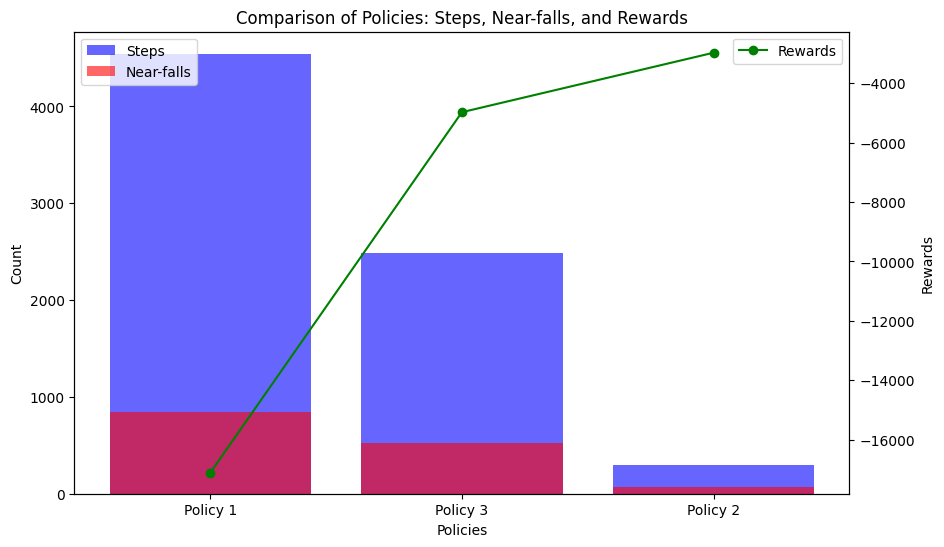

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the policies
policies = ['Policy 1', 'Policy 3', 'Policy 2']
steps = [4545, 2483, 298]
near_falls = [845, 521, 69]
rewards = [-17118, -4974, -2971]

# Calculate the ratio of near-falls to steps
near_fall_ratios = [nf / s for nf, s in zip(near_falls, steps)]

# Histogram
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for steps and near-fall ratios
ax1.bar(policies, steps, color='b', alpha=0.6, label='Steps')
ax1.bar(policies, near_falls, color='r', alpha=0.6, label='Near-falls')
ax1.set_xlabel('Policies')
ax1.set_ylabel('Count')
ax1.legend(loc='upper left')

# y-axis for rewards
ax2 = ax1.twinx()
ax2.plot(policies, rewards, color='g', marker='o', label='Rewards')
ax2.set_ylabel('Rewards')
ax2.legend(loc='upper right')

plt.title('Comparison of Policies: Steps, Near-falls, and Rewards')
plt.show()

In [ ]:
#part 2: policy iteration

#part 2: policy iteration

import numpy as np
 # value function V(s) w small non-zero values

def policy_iteration(env, gamma=0.8, theta=1e-6):
    nS = env.observation_space.n #states
    nA = env.action_space.n #actions
    goal_state = nS - 1

    #initialize value function
    V = np.random.uniform(low=0.0, high=1e-6, size=nS)
    V[goal_state] = 0
    policy = np.random.choice(nA, size=nS)

    #random policy generated
    policy_stable = False
    while not policy_stable:
        # Policy Evaluation
        while True:
            delta = 0
            V_new = np.copy(V)  # Create a new value table for asynchronous updates

            for s in range(nS):
                    if s == goal_state:
                        continue
                        old_action = policy[s] #moved
                        a = policy[s]  # Current action under the policy
                        V_new[s] = sum(
                        p * (r + gamma * V[s_prime])
                    for p, s_prime, r, _ in env.unwrapped.P[s][a]
                )
                        delta = max(delta, abs(V[s] - V_new[s]))

                        V = V_new
                        if delta < theta:break

# Check for convergence
        goal_state = nS - 1 #moved outside of loop
        policy_stable = True
        for s in range(nS):
            if s == goal_state:
                continue

            #POLICY IMPROVEMENT
            old_action = policy[s] #moved here for access within the loop
            #define action_values before using it in the loop below
            action_values = np.zeros(nA)
            # action that maximizes the value function
            for a in range(nA):
                action_values[a] = sum(
                p * (r + gamma * V[s_prime])
                for p, s_prime, r, _ in env.unwrapped.P[s][a]
            )
            policy[s] = np.argmax(action_values)


            # Check if the policy has changed
            if old_action != policy[s]:
                policy_stable = False
    return policy, V #moved outside of the for s in range(nS)

In [ ]:
import gym
env = gym.make('CliffWalking-v0')



In [ ]:
import numpy as np
def policy_iteration(env, gamma=0.8, theta=1e-6, max_iterations=100):
    nS = env.observation_space.n  # Number of states
    nA = env.action_space.n       # Number of actions
    goal_state = nS - 1           # Goal state

    # Initialize value function with small non-zero values
    V = np.random.uniform(low=0.0, high=1e-6, size=nS)
    V[goal_state] = 0  # Goal state has a value of 0

    # Initialize a random policy
    policy = np.random.choice(nA, size=nS)

    policy_stable = False
    iteration = 0
    while not policy_stable and iteration < max_iterations:
        iteration += 1

        # Policy Evaluation
        while True:
            delta = 0
            V_new = np.copy(V)  # Create a new value table for updates

            # Vectorized Policy Evaluation
            for s in range(nS):
                if s == goal_state:
                    continue  # Skip the goal state

                a = policy[s]  # Current action under the policy
                # Sum over possible transitions (vectorized)
                V_new[s] = sum(
                    p * (r + gamma * V[s_prime])
                    for p, s_prime, r, _ in env.unwrapped.P[s][a]
                )
                delta = max(delta, abs(V[s] - V_new[s]))

            V = np.copy(V_new)

            # Check for convergence in policy evaluation
            if delta < theta:
                break

        # Policy Improvement
        policy_stable = True
        for s in range(nS):
            if s == goal_state:
                continue  # Skip the goal state

            old_action = policy[s]
            action_values = np.zeros(nA)

            # Vectorized Policy Improvement
            for a in range(nA):
                action_values[a] = sum(
                    p * (r + gamma * V[s_prime])
                    for p, s_prime, r, _ in env.unwrapped.P[s][a]
                )

            # Choose the action that maximizes the value function
            policy[s] = np.argmax(action_values)

            # Check if the policy has changed
            if old_action != policy[s]:
                policy_stable = False

    return policy, V

policy, value_function = policy_iteration(env, max_iterations=100)
print("Policy:", policy)
print("Value Function:", value_function)

Policy: [1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 0
 0 0 0 0 0 0 0 0 0 1 2]
Value Function: [-4.78009767 -4.72512209 -4.65640262 -4.57050327 -4.46312909 -4.32891136
 -4.1611392  -3.951424   -3.68928    -3.3616     -2.952      -2.44
 -4.72512209 -4.65640262 -4.57050327 -4.46312909 -4.32891136 -4.1611392
 -3.951424   -3.68928    -3.3616     -2.952      -2.44       -1.8
 -4.65640262 -4.57050327 -4.46312909 -4.32891136 -4.1611392  -3.951424
 -3.68928    -3.3616     -2.952      -2.44       -1.8        -1.
 -4.72512209 -4.65640262 -4.57050327 -4.46312909 -4.32891136 -4.1611392
 -3.951424   -3.68928    -3.3616     -2.952      -1.          0.        ]
